<a href="https://colab.research.google.com/github/yogi2034/Deep-Learning/blob/main/001pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Plans for this chapter

-Data (prepare and load )

-build a model

-fitting the model to the data

-make prediction and evaluate

-Save and load

-putting it all together

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

We will use linear regression which uses known Parameters to 'll use linear regression to create the data with known parameters (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using gradient descent.

In [ ]:
# create known param
w=0.7
b=0.3

# create
start =0
end =1
step = 0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
Y=w*X+b

X[:10],Y[:10],len(X),len(Y)


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

# Split

In [ ]:
train_set =int(0.8*len(X))
X_train ,Y_train=X[:train_set],Y[:train_set]

X_test,Y_test=X[train_set:],Y[train_set:]
len(X_train),len(Y_train),len(X_test),len(Y_test)

(40, 40, 10, 10)

# Visualize

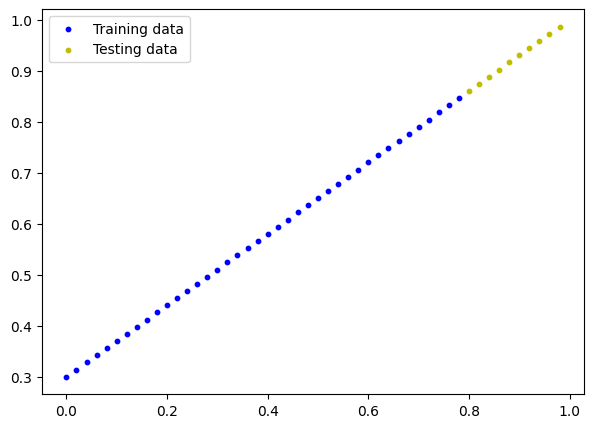

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None):
  plt.figure(figsize=(7,5))

  plt.scatter(train_data,train_labels,c="b",s=10,label="Training data")
  plt.scatter(test_data,test_labels,c="y",s=10,label="Testing data")


  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

  plt.legend(prop={"size":10})

plot_predictions()

# Build Model

Linear Regression implementation

In [ ]:
from torch import nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights =nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))

        self.bias=nn.Parameter(torch.randn(1,
                                      requires_grad=True,
                                      dtype=torch.float))

    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.weights*x+self.bias




In [ ]:
torch.manual_seed(42)
model_0 =LinearRegressionModel()
model_0
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode():
    y_preds=model_0(X_test)
y_preds
# y_preds=model_0(X_test)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
X_test,Y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

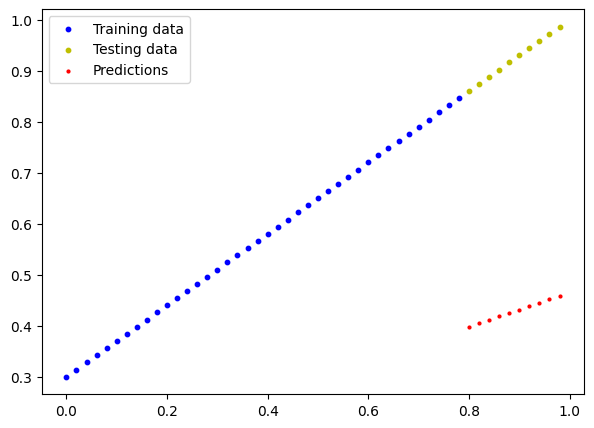

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
loss_fn=nn.L1Loss()
loss_fn

# optmizer
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)



**Building a training Loop**

In [ ]:
list(model_0.eval().parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
epochs=200
epoch_count=[]
loss_values=[]
test_loss_values=[]
for epoch in range(epochs):
  model_0.train()
  # model_0.eval()
  y_pred=model_0(X_train)
  loss=loss_fn(y_pred,Y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()

  with torch.inference_mode():
    test_pred=model_0(X_test)
    test_loss=loss_fn(test_pred,Y_test)
  if(epoch%10==0):
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch:{epoch}   |Loss:{loss}   |Test Loss:   {test_loss}")
print(model_0.state_dict())


Epoch:0   |Loss:0.31288138031959534   |Test Loss:   0.48106518387794495
Epoch:10   |Loss:0.1976713240146637   |Test Loss:   0.3463551998138428
Epoch:20   |Loss:0.08908725529909134   |Test Loss:   0.21729660034179688
Epoch:30   |Loss:0.053148526698350906   |Test Loss:   0.14464017748832703
Epoch:40   |Loss:0.04543796554207802   |Test Loss:   0.11360953003168106
Epoch:50   |Loss:0.04167863354086876   |Test Loss:   0.09919948130846024
Epoch:60   |Loss:0.03818932920694351   |Test Loss:   0.08886633068323135
Epoch:70   |Loss:0.03476089984178543   |Test Loss:   0.0805937647819519
Epoch:80   |Loss:0.03132382780313492   |Test Loss:   0.07232122868299484
Epoch:90   |Loss:0.02788739837706089   |Test Loss:   0.06473556160926819
Epoch:100   |Loss:0.024458957836031914   |Test Loss:   0.05646304413676262
Epoch:110   |Loss:0.021020207554101944   |Test Loss:   0.04819049686193466
Epoch:120   |Loss:0.01758546568453312   |Test Loss:   0.04060482233762741
Epoch:130   |Loss:0.014155393466353416   |Test Lo

In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()),test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

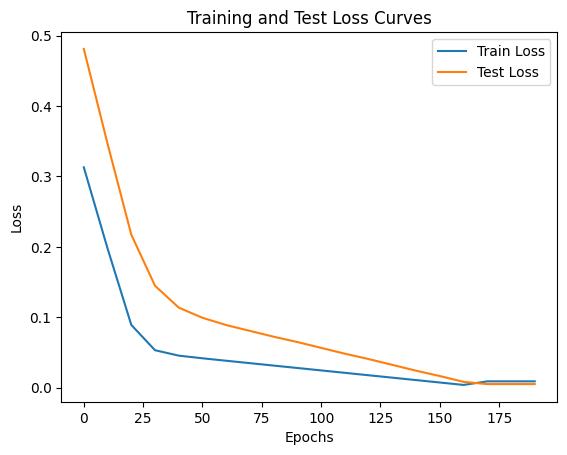

In [ ]:
plt.plot(epoch_count,np.array(torch.tensor(loss_values).cpu().numpy()),label="Train Loss")
plt.plot(epoch_count,test_loss_values,label="Test Loss")
plt.title("Training and Test Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

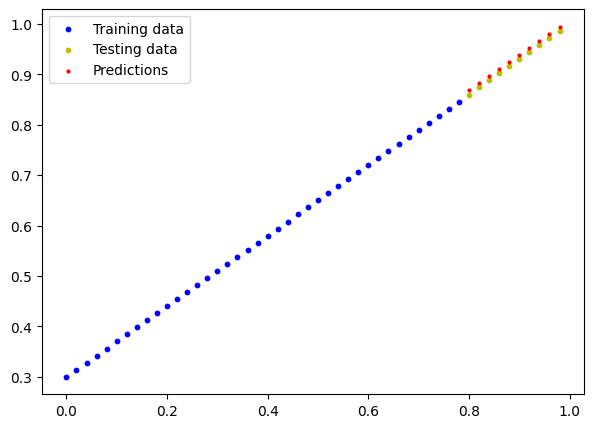

In [ ]:
plot_predictions(predictions=test_pred)

## Saving and Load a model

In [ ]:
from pathlib import Path

MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME="01_PYTORCH_WORKFLOW_MODEL_0.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to:models/01_PYTORCH_WORKFLOW_MODEL_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 May  7 07:14 01_PYTORCH_WORKFLOW_MODEL_0.pth


# Load

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
loaded_model_0=LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)


loaded_model_preds


tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
y_preds==loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# A li'l summary

In [ ]:
 import torch
 from torch import nn
 import matplotlib.pyplot as plt

 torch.__version__

'2.6.0+cu124'

In [ ]:
device='cuda' if torch.cuda.is_available() else "cpu"
print(f"Device:{device}")

Device:cpu


In [ ]:
w=0.7
b=0.3

start = 0
end=1
step =0.01
X= torch.arange(start,end,step).unsqueeze(1)
y=w*X+b

In [ ]:
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)


(80, 80, 20, 20)

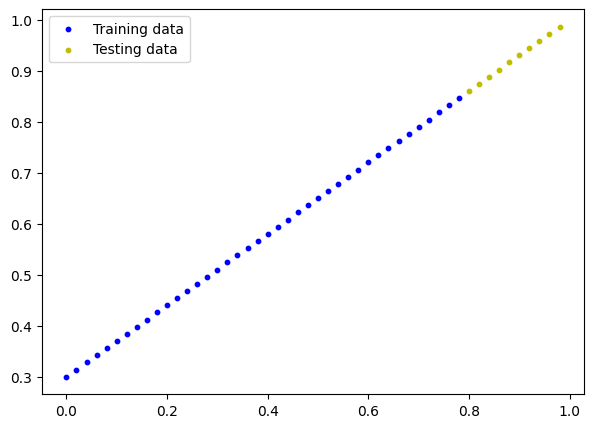

In [ ]:
plot_predictions(predictions=None)

In [ ]:
from torch import nn
class LinearReg(nn.Module):
  def __init__(self):
    super().__init__()
    # self.weights=nn.parameter(torch.rand(1,
    #                                      requires_grad=True,
    #                                      dtype=torch.float))
    # self.bias=nn.parameter(torch.rand(1,
    #                                   requires_grad=True
    #                                   dtype=torch.float))
    self.linear_layer=nn.Linear(in_features=1,out_features=1)

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1=LinearReg()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
model_1.to(device)
next(model_1.parameters()) .device


device(type='cpu')

In [ ]:
loss_fn=nn.L1Loss()

optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.01)


In [ ]:
torch.manual_seed(42)
epochs= 200

for epoch in range(epochs):
  model_1.train()

  y_pred= model_1(X_train)
  loss= loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with  torch.inference_mode():
    test_pred=model_1(X_test)
    test_loss=loss_fn(test_pred,y_test)


  if epoch%10==0:
    print(f"epoch:{epoch} |Loss:{loss} |Test Loss :{test_loss}")


epoch:0 |Loss:0.5555006265640259 |Test Loss :0.5742346048355103
epoch:10 |Loss:0.43989819288253784 |Test Loss :0.4388822615146637
epoch:20 |Loss:0.3242958188056946 |Test Loss :0.30352982878685
epoch:30 |Loss:0.20869341492652893 |Test Loss :0.16817744076251984
epoch:40 |Loss:0.09309100359678268 |Test Loss :0.0328250378370285
epoch:50 |Loss:0.024206461384892464 |Test Loss :0.04891900345683098
epoch:60 |Loss:0.020295290276408195 |Test Loss :0.04614274203777313
epoch:70 |Loss:0.01686828024685383 |Test Loss :0.03849516063928604
epoch:80 |Loss:0.01344125997275114 |Test Loss :0.030847568064928055
epoch:90 |Loss:0.010015219449996948 |Test Loss :0.022855961695313454
epoch:100 |Loss:0.006589989177882671 |Test Loss :0.014520359225571156
epoch:110 |Loss:0.003164681838825345 |Test Loss :0.006877091713249683
epoch:120 |Loss:0.006687174551188946 |Test Loss :0.009153103455901146
epoch:130 |Loss:0.006687174551188946 |Test Loss :0.009153103455901146
epoch:140 |Loss:0.006687174551188946 |Test Loss :0.009

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6954]])),
             ('linear_layer.bias', tensor([0.3085]))])

In [ ]:
model_1.eval()

with torch.inference_mode():
   y_preds=model_1(X_test)


len(y_preds)
len(y_preds)==len(X_test)

True

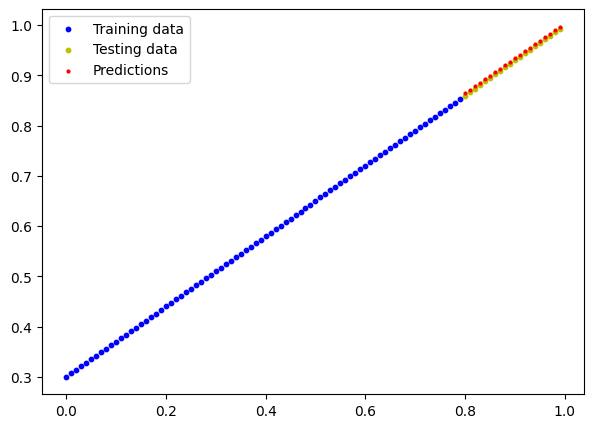

In [ ]:
plot_predictions(
    X_train.squeeze(),
    y_train.squeeze(),
    X_test.squeeze(),
    y_test.squeeze(),
    predictions=y_preds.squeeze()
)


In [ ]:
from pathlib import Path

model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)

model_name ="01_pytorch_workflow_model_1.pth"
model_save_path=model_path/model_name

In [ ]:
torch.save(obj=model_1.state_dict(),f=model_save_path)

In [ ]:
loaded_model_1=LinearReg()
loaded_model_1.load_state_dict(torch.load(model_save_path))
loaded_model_1.to(device)

LinearReg(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds=loaded_model_1(X_test)
y_preds==loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])